# Time Series - Lecture 1: Introduction

## Agenda
- Iintroduction to time series
- Datetime library in Python
- Wrangle data in Python
- Visualize time series data

### What is / Why Time Series?
- Data drawn from a distribution correlated over time. (You have implictly assumed that data was drawn from an independent distribution.)
- As a data analyst, you WILL encounter time series data. 
- Examples:
    - Economics/Finance: Stock, bond, other asset prices, government policies
    - Science/AI: climate (change) data, speech recognition
    - Business: user behavior data 
    
For example,

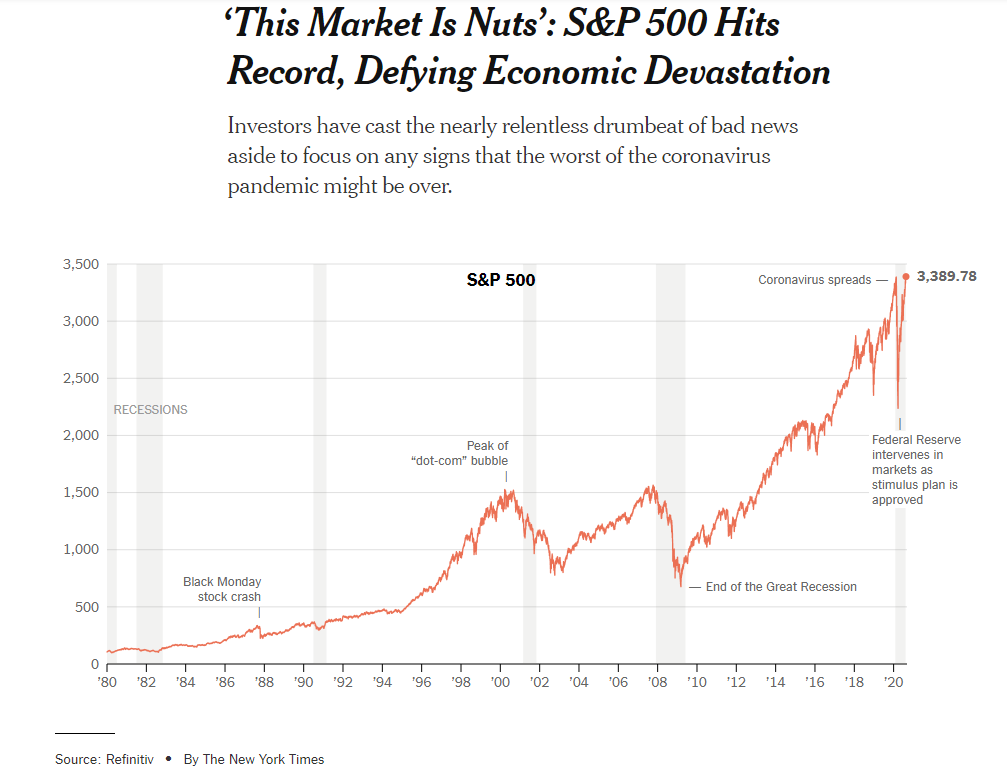

In [97]:
from PIL import Image
Image.open("images/sp500.png")

In a time series, time is often the independent variable and the goal is to make a forecast for the future. From the historical data, we can find some **patterns or trend** which will help us understand the movement and forecast. Some concepts to help you recognize patterns:

For example,

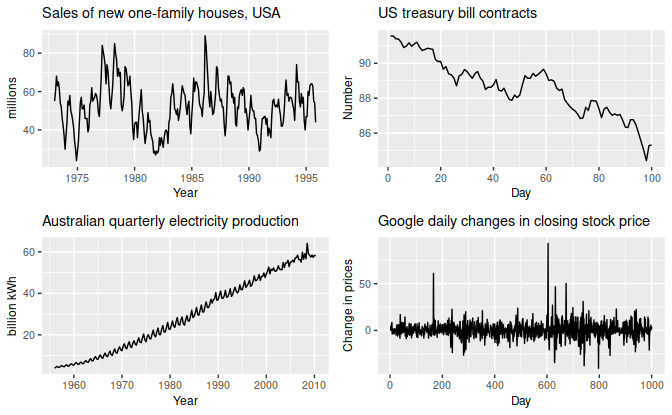

In [98]:
from PIL import Image
Image.open("images/pattern.png")

1. The monthly housing sales (top left) show seasonality within each year. 
2. The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.

What do you think about the othe two graphs?
3. The Australian quarterly electricity production (bottom left).
4. The daily change in the Google closing stock price (bottom right).

## Time Series in Python

Python has built in tools for dealing with time data, and we will first familiarize ourselves.

### Data Structure
- Many observations from same individual/sample over time (i.e., $Y_t$ where $t=1,...,T$)
- Detailed time information (e.g., $X_t=$ 2020-09-23 3-PM)

For example,

In [99]:
import pandas as pd
pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577
...,...,...
843,2020-04-01,0.928110
844,2020-05-01,-0.027055
845,2020-06-01,-0.121800
846,2020-07-01,-0.411820


## Datetime in Pandas

- Pandas has a build-in feature to handle the time data with ease
- Built in data structures
    - Time Stamp
    - Time Delta
    - Time Period
- To handle these structures, need numpy package

### Timestamp

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [101]:
pd.date_range('2020 Sep 23', periods = 5, freq = 'S')

DatetimeIndex(['2020-09-23 00:00:00', '2020-09-23 00:00:01',
               '2020-09-23 00:00:02', '2020-09-23 00:00:03',
               '2020-09-23 00:00:04'],
              dtype='datetime64[ns]', freq='S')

In [102]:
pd.Timestamp('2020-09-23')

Timestamp('2020-09-23 00:00:00')

In [103]:
pd.Timestamp('2020-09-23 09:00')

Timestamp('2020-09-23 09:00:00')

### Timedelta
- Can take both positive and negative values

In [104]:
pd.Timedelta('1 day')

Timedelta('1 days 00:00:00')

In [105]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('15 ns')

Timestamp('2016-01-01 10:10:00.000000015')

### Timeperiod
- Refer to specific length of time between a start and end time stamp
- Fancier setting allowed such as business days

In [106]:
pd.Period('2020-09-23')

Period('2020-09-23', 'D')

In [107]:
pd.Period('2020-09-23')

Period('2020-09-23', 'D')

In [108]:
pd.period_range('2020-09-23 09:00:00', freq = 'B', periods = 10)

PeriodIndex(['2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
             '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
             '2020-10-05', '2020-10-06'],
            dtype='period[B]', freq='B')

In [109]:
temp = pd.Series(range(10), pd.date_range('2020-09-23 09:00', periods = 10, freq = 'H'))
temp

2020-09-23 09:00:00    0
2020-09-23 10:00:00    1
2020-09-23 11:00:00    2
2020-09-23 12:00:00    3
2020-09-23 13:00:00    4
2020-09-23 14:00:00    5
2020-09-23 15:00:00    6
2020-09-23 16:00:00    7
2020-09-23 17:00:00    8
2020-09-23 18:00:00    9
Freq: H, dtype: int64

### Time Zone handling

In [110]:
pd.Timestamp('9/1/2020 00:00',tz='Europe/London')

Timestamp('2020-09-01 00:00:00+0100', tz='Europe/London')

In [111]:
temp1 = temp.tz_localize(tz = 'Europe/London')
temp1

2020-09-23 09:00:00+01:00    0
2020-09-23 10:00:00+01:00    1
2020-09-23 11:00:00+01:00    2
2020-09-23 12:00:00+01:00    3
2020-09-23 13:00:00+01:00    4
2020-09-23 14:00:00+01:00    5
2020-09-23 15:00:00+01:00    6
2020-09-23 16:00:00+01:00    7
2020-09-23 17:00:00+01:00    8
2020-09-23 18:00:00+01:00    9
Freq: H, dtype: int64

In [112]:
temp1.tz_convert('Asia/Tokyo')

2020-09-23 17:00:00+09:00    0
2020-09-23 18:00:00+09:00    1
2020-09-23 19:00:00+09:00    2
2020-09-23 20:00:00+09:00    3
2020-09-23 21:00:00+09:00    4
2020-09-23 22:00:00+09:00    5
2020-09-23 23:00:00+09:00    6
2020-09-24 00:00:00+09:00    7
2020-09-24 01:00:00+09:00    8
2020-09-24 02:00:00+09:00    9
Freq: H, dtype: int64

In [113]:
ts.resample('D').sum()

NameError: name 'ts' is not defined

### Resampling

In [ ]:
temp = pd.date_range('1/1/2011', periods=72, freq='H')
temp

In [ ]:
temp1 = pd.Series(np.random.randn(len(temp)), index=temp)
temp1.asfreq('45Min', method='pad')

In [ ]:
temp1.asfreq('45Min', method='backfill')

## Empirical Case: New Year's Resolution


In this session, we're going to check out Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. Could there be more searches for these terms in January when we're all trying to turn over a new leaf? We're not going to do much mathematics today but we'll source Our data, visualize it and learn about trends and seasonality in time series data. First if all, we will focus on a visual exploration of the dataset in question, and then we will predict its values sometime in the future.

So the question remains: could there be more searches for these terms in January when we're all trying to turn over a new leaf? Let's find out by going [here](https://trends.google.com/trends/explore?date=all&q=diet,gym,finance) and checking out the data (inspired this [this fivethirtyeight piece](https://fivethirtyeight.com/features/how-fast-youll-abandon-your-new-years-resolutions/)).

###  Reading In Data

Let's read in some data:

In [ ]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.head()

Use the .info() method to check out your data types, number of rows and more:

In [ ]:
df.info()

In [ ]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

### Graphing

Visualization is a powerful tool for an analyst to recognize any pattern in the data. 

In [ ]:
df.plot(figsize=(9,9), linewidth=2, fontsize=15)
plt.xlabel('Year', fontsize=20)

## Recap:
- You've gotten an overview/introduction to time series.
- You've understood how to use datetime library in Python.
- You've imported your data from google trends.
- You've wrangled your data and gotten it into the form you want to prepare it for analysis.
- You've checked out youe time series visually.

## Up next:

- Identify trends in your time series

# Activities

1.  Which of these formats DON'T work?
    - '2016 Jul 1'
    - '7/1/2016'
    - '1/7/2016'
    - 'July 1, 2016'
    - '2016-07-01'
    - '2016/07/01'
2. Read in 'multiTimeline.csv', and convert the date format **into** January 1, 2004; January 2, 2004, and etc. **from** January 1, 2020, February 1, 2020, and etc. 
3. Can you think of 3 occasions where you would use resampling function in time series analysis? 
4. Find publicly available data of **your interest** with time variable.

    I believe the best way to learn is by doing. Motivation is high when you are working on a subject of personal interest. 

    To take advantage of the small class, I would like to make the activities personalized to a data set of your interest. After each lecture, when you are off to do your activities, I would like you to try doing the activities/exercises on the data set of  your choosing. Here are some examples of time series data:
    - [Yahoo Finance](https://finance.yahoo.com/) historical stock/bond/ETF price data
    - [St. Louis Fed](https://fred.stlouisfed.org/series/GDP) or [BLS](https://www.bls.gov/data/#unemployment) for any macroeconomic data
    - [COVID](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)


5. Load 'multiTimeline.csv'. Play around with the graph to find any trends, and share your opinion. 


## References

The materials presented here are inspired and modified from the following sources:

- https://www.nytimes.com/2020/08/18/business/stock-market-record.html
- https://otexts.com/fpp2/
- https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython
- https://www.cpc.ncep.noaa.gov/products/precip/CWlink/
- https://github.com/CodeOp-tech/tsa-soyhyoj/blob/master/New_Years_Resolutions_Workshop.ipynb